In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/fars.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'fars'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0.00001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
12 36 4
15 45 5
18 54 6
21 63 7
21 63 8
24 72 9
26 78 10
29 87 11
31 93 12
33 99 13
36 108 14
39 117 15
41 123 16
44 132 17
47 141 18
49 147 19
52 156 20
55 165 21
58 174 22
61 183 23
64 192 24
66 198 25
68 204 26
71 213 27
74 222 28
77 231 29
79 237 30
82 246 31
85 255 32
88 264 33
91 273 34
93 279 35
96 288 36
99 297 37
102 306 38
104 312 39
107 321 40
110 330 41
112 336 42
114 342 43
117 351 44
118 354 45
120 360 46
123 369 47
126 378 48
129 387 49
131 393 50
134 402 51
136 408 52
139 417 53
141 423 54
143 429 55
145 435 56
148 444 57
149 447 58
151 453 59
154 462 60
156 468 61
159 477 62
162 486 63
163 489 64
164 492 65
165 495 66
167 501 67
169 507 68
171 513 69
173 519 70
176 528 71
177 531 72
179 537 73
181 543 74
184 552 75
186 558 76
187 561 77
189 567 78
191 573 79
193 579 80
196 588 81
199 597 82
202 606 83
203 609 84
205 615 85
208 624 86
210 630 87
213 639 88
215 645 89
217 651 90
218 654 91
220 660 92
221 663 93
222 666 94
223 669 95
224 672 96
226 678

([0.5745716428258132,
  0.5745716428258132,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5732274997523947,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731850531290236,
  0.5731850531290236,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5731709042545665,
  0.5732133508779377,
  0.5732133508779377,
  0.5732274997523947,
  0.5732274997523947,
  0.5732416486268518,
  0.5732416486268518,
  0.5732416486268518,
  0.5732274997523947,
  0.5732274997523947,
  0.5732416486268518,
  0.5732416486268518,
  0.5732557975013087,
  0.573255

In [6]:
gtgp_m1 = gtgp

<Axes: >

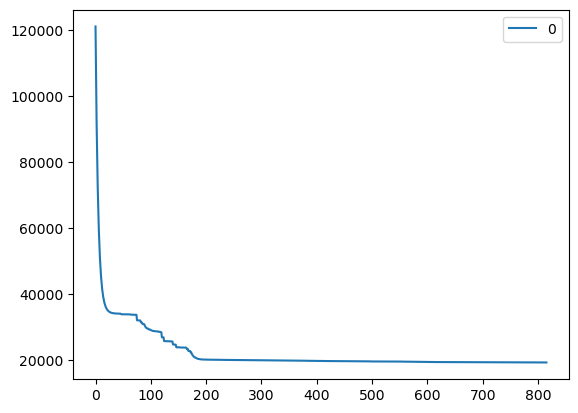

In [7]:
pd.DataFrame(gtgp_m1.train_sse).plot()

In [8]:
def fit_trees():
    learning_rate=0.1
    max_depth=1
    bins=8
    lam=100

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=10
    elite_size = 3
    epoch= 1
    gp_epoch= 1000
    verbose = 1
    tolerance=0.00001

    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    retrain_epoch=1
    alpha=0
    beta=1
    gammer=0

    verbose=1
    gtgp.lam = 1
    gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    gtgp = fit_trees()

    print(classification_report(y_train,np.argmax(gtgp.train_p,axis=1),digits=5))
    print(classification_report(y_test,np.argmax(gtgp.test_p,axis=1),digits=5))

    num_trees,depth,num_nodes = gtgp.print_model()

    train_acc = accuracy_score(y_train,np.argmax(gtgp.train_p,axis=1))
    test_acc = accuracy_score(y_test,np.argmax(gtgp.test_p,axis=1))
    train_f1 = f1_score(y_train,np.argmax(gtgp.train_p,axis=1),average='macro')
    test_f1 = f1_score(y_test,np.argmax(gtgp.test_p,axis=1),average='macro')


    # with open('./benchmark/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_f1)+","+str(test_f1)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

2246 2729678 1
retrain  1 :
	train: 0.763317628082686 21247.884774684175 	test: 0.7620745435938068 9116.264869133443
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         6
           1    0.99584   0.99851   0.99717     29481
           2    0.44716   0.93450   0.60488     10550
           3    0.00000   0.00000   0.00000       209
           4    0.79402   0.99586   0.88356     14005
           5    0.45912   0.06757   0.11781      9723
           6    0.00000   0.00000   0.00000      6072
           7    0.67123   0.07765   0.13920       631

    accuracy                        0.76332     70677
   macro avg    0.42092   0.38426   0.34283     70677
weighted avg    0.70863   0.76332   0.69877     70677



c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhouz\anaconda3\envs\BStackGP\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zhou

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         3
           1    0.99645   0.99897   0.99771     12635
           2    0.44546   0.93012   0.60241      4522
           3    0.00000   0.00000   0.00000        90
           4    0.79225   0.99500   0.88213      6002
           5    0.42788   0.06335   0.11037      4167
           6    0.00000   0.00000   0.00000      2602
           7    0.74074   0.07407   0.13468       270

    accuracy                        0.76207     30291
   macro avg    0.42535   0.38269   0.34091     30291
weighted avg    0.70458   0.76207   0.69727     30291

----------------GTGP-------------
Number of Trees: 2246
Average of depth: 17.74487978628673
Number of nodes: 2729678


In [9]:
gtgp_m2 = gtgp

<Axes: >

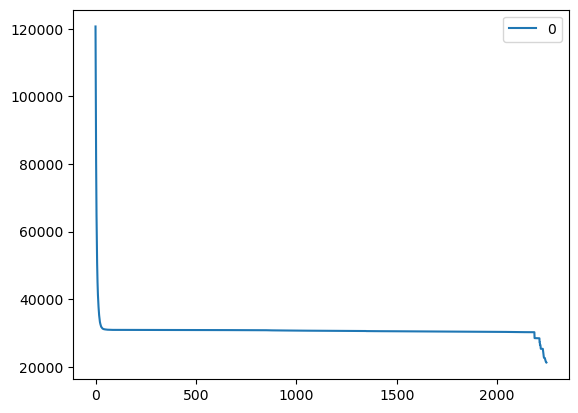

In [10]:
pd.DataFrame(gtgp_m2.train_sse).plot()

# comparison

In [11]:
gtgp_m1.print_model()
print()
print("train acc",gtgp_m1.train_acc[-1])
print("train f1",gtgp_m1.train_f1_score[-1])
print("test acc",gtgp_m1.test_acc[-1])
print("test f1",gtgp_m1.test_f1_score[-1])
gtgp_m2.print_model()
print()
print("train acc",gtgp_m2.train_acc[-1])
print("train f1",gtgp_m2.train_f1_score[-1])
print("test acc",gtgp_m2.test_acc[-1])
print("test f1",gtgp_m2.test_f1_score[-1])

----------------GTGP-------------
Number of Trees: 816
Average of depth: 1.0
Number of nodes: 2448

train acc 0.7859982738373162
train f1 0.4489045510579499
test acc 0.7855468621042554
test f1 0.44576661077101076
----------------GTGP-------------
Number of Trees: 2246
Average of depth: 17.74487978628673
Number of nodes: 2729678

train acc 0.763317628082686
train f1 0.3428281689405491
test acc 0.7620745435938068
test f1 0.3409111171383013


In [12]:
gtgp_m1.train_acc[-1],gtgp_m1.train_f1_score[-1],gtgp_m2.train_acc[-1],gtgp_m2.train_f1_score[-1]

(0.7859982738373162, 0.4489045510579499, 0.763317628082686, 0.3428281689405491)

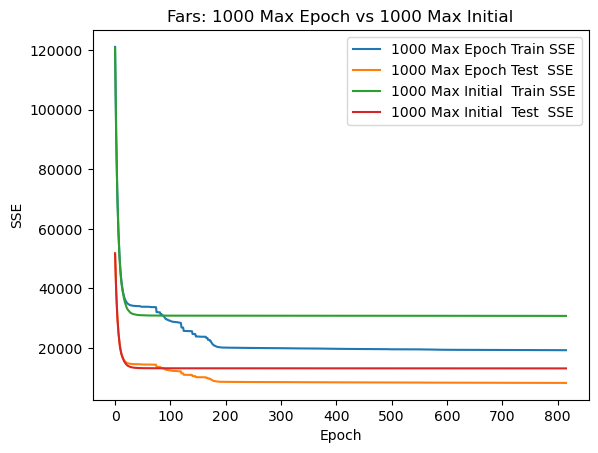

In [15]:
m1_train_sse = np.array(gtgp_m1.train_sse)
m2_train_sse = np.array(gtgp_m2.train_sse)[:m1_train_sse.shape[0]]

m1_test_sse = np.array(gtgp_m1.test_sse)
m2_test_sse = np.array(gtgp_m2.test_sse)[:m1_train_sse.shape[0]]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.title("Fars: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])

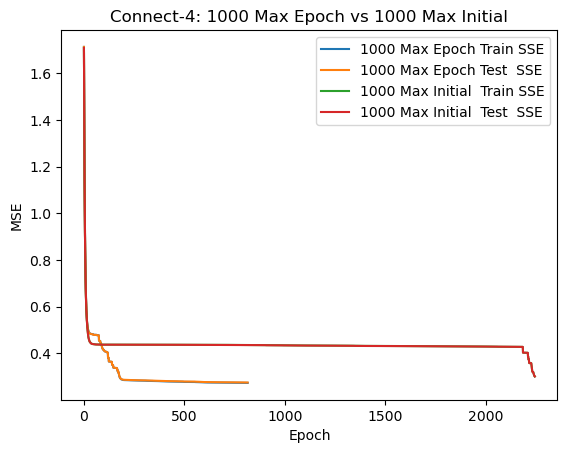

In [14]:
m1_train_sse = np.array(gtgp_m1.train_sse)/y_train.shape[0]
m2_train_sse = np.array(gtgp_m2.train_sse)/y_train.shape[0]

m1_test_sse = np.array(gtgp_m1.test_sse)/y_test.shape[0]
m2_test_sse = np.array(gtgp_m2.test_sse)/y_test.shape[0]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])